In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import statistics

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_excel("dataset/data.xlsx")
df

,Time,T,D mm,Lever water
0,2012-09-08 15:00:00,26.35,-0.272825,203.84
1,2012-09-09 15:00:00,26.55,-0.274590,204.10
2,2012-09-10 15:00:00,26.52,-0.266053,204.47
3,2012-09-11 15:00:00,26.86,-0.261221,204.77
4,2012-09-12 15:00:00,26.94,-0.256358,205.10
...,...,...,...,...
52646,2022-09-25 19:00:00,27.91,0.189796,211.71
52647,2022-09-25 20:00:00,27.87,0.189740,211.74
52648,2022-09-25 21:00:00,27.87,0.190367,211.77
52649,2022-09-25 22:00:00,27.86,0.190916,211.79


# Data Pre-Processing

In [3]:
# Split Time to Day, Month, Year
df["Time"] = pd.to_datetime(df["Time"])
df['Day_of_week'] = df['Time'].dt.day_name()
df['Day'] = df['Time'].dt.day
df['Month'] = df['Time'].dt.month
df['Year'] = df['Time'].dt.year
df['Hour'] = df['Time'].dt.hour
df['Date'] = [d.date() for d in df['Time']]

# Toal_seconds
df["Time_today"] = datetime.today()
df['Seconds'] = df["Time_today"] - df["Time"]
df['Seconds'] = df['Seconds'].dt.total_seconds()

# Rainy season in the North: May, June, July, August, September; rainy season with little rain: the remaining months
df["Season"] = ["heavy rain" if month in [5, 6, 7, 8, 9] else "little rain" for  month in df["Month"]]

df['Period'] = ['am' if hour in range(5, 17) else 'pm' for hour in df['Hour']]

# Display
df = df.drop("Time_today", axis = 1)
df

,Time,T,D mm,Lever water,Day_of_week,Day,Month,Year,Hour,Date,Seconds,Season,Period
0,2012-09-08 15:00:00,26.35,-0.272825,203.84,Saturday,8,9,2012,15,2012-09-08,3.560484e+08,heavy rain,pm
1,2012-09-09 15:00:00,26.55,-0.274590,204.10,Sunday,9,9,2012,15,2012-09-09,3.559620e+08,heavy rain,pm
2,2012-09-10 15:00:00,26.52,-0.266053,204.47,Monday,10,9,2012,15,2012-09-10,3.558756e+08,heavy rain,pm
3,2012-09-11 15:00:00,26.86,-0.261221,204.77,Tuesday,11,9,2012,15,2012-09-11,3.557892e+08,heavy rain,pm
4,2012-09-12 15:00:00,26.94,-0.256358,205.10,Wednesday,12,9,2012,15,2012-09-12,3.557028e+08,heavy rain,pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52646,2022-09-25 19:00:00,27.91,0.189796,211.71,Sunday,25,9,2022,19,2022-09-25,3.903243e+07,heavy rain,pm
52647,2022-09-25 20:00:00,27.87,0.189740,211.74,Sunday,25,9,2022,20,2022-09-25,3.902883e+07,heavy rain,pm
52648,2022-09-25 21:00:00,27.87,0.190367,211.77,Sunday,25,9,2022,21,2022-09-25,3.902523e+07,heavy rain,pm
52649,2022-09-25 22:00:00,27.86,0.190916,211.79,Sunday,25,9,2022,22,2022-09-25,3.902163e+07,heavy rain,pm


## Delete missing data

In [4]:
df.isnull().sum()

Time            0
T              16
D mm            0
Lever water     0
Day_of_week     0
Day             0
Month           0
Year            0
Hour            0
Date            0
Seconds         0
Season          0
Period          0
dtype: int64

In [5]:
# Delete missing data
def delete_missing(data):
    for col in data.columns:
        miss_ind = data[col][data[col].isnull()].index
        data = data.drop(miss_ind, axis = 0)
    return data

df = delete_missing(df)

In [6]:
df.describe()

,Time,T,D mm,Lever water,Day,Month,Year,Hour,Seconds
count,52635,52635.000000,52635.000000,52635.000000,52635.000000,52635.000000,52635.000000,52635.000000,5.263500e+04
mean,2019-07-18 16:12:45.825021184,24.976204,-0.533901,203.991060,15.814515,6.593388,2019.037409,11.431880,1.396985e+08
min,2012-09-08 15:00:00,-99.000000,-160.744246,175.810000,1.000000,1.000000,2012.000000,0.000000,3.901803e+07
25%,2018-01-22 10:30:00,23.680000,0.057944,196.630000,8.000000,3.000000,2018.000000,6.000000,8.783583e+07
50%,2019-07-24 15:00:00,26.080000,0.264145,206.460000,16.000000,7.000000,2019.000000,11.000000,1.391844e+08
75%,2021-03-09 22:30:00,27.880000,0.983092,213.410000,23.000000,10.000000,2021.000000,17.000000,1.865478e+08
max,2022-09-25 23:00:00,217.500000,3.101148,217.150000,31.000000,12.000000,2022.000000,23.000000,3.560484e+08
std,NaN,10.220573,12.897712,10.302321,8.781914,3.458013,1.985161,6.870256,6.132491e+07


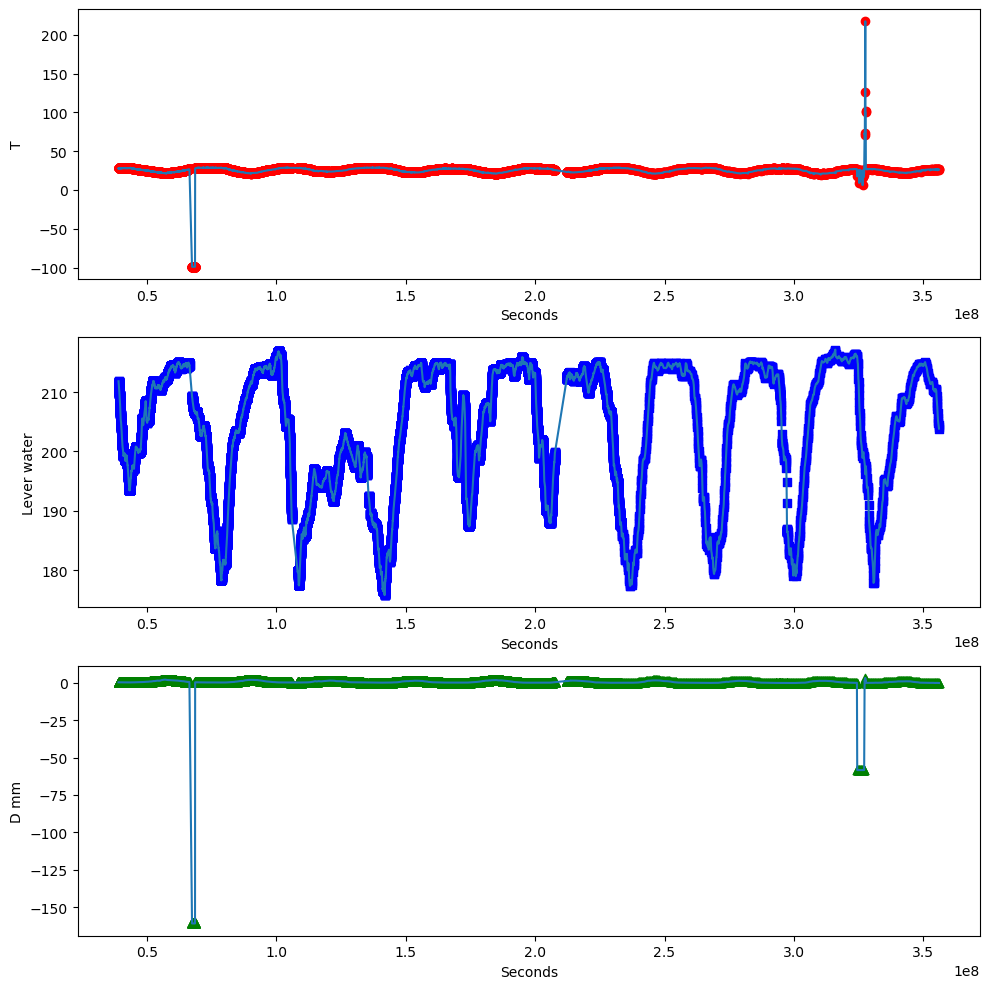

In [7]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Plot for 'T' column
axes[0].set_xlabel("Seconds")
axes[0].set_ylabel("T")
axes[0].plot(df['Seconds'], df['T'])

# Plot for 'Lever water' column
axes[1].set_xlabel("Seconds")
axes[1].set_ylabel("Lever water")
axes[1].plot(df['Seconds'], df['Lever water'])

# Plot for 'D mm' column
axes[2].set_xlabel("Seconds")
axes[2].set_ylabel("D mm")
axes[2].plot(df['Seconds'], df['D mm'])

# Add scatter plot for 'T' column
axes[0].scatter(df['Seconds'], df['T'], color='red', marker='o')

# Add scatter plot for 'Lever water' column
axes[1].scatter(df['Seconds'], df['Lever water'], color='blue', marker='s')

# Add scatter plot for 'D mm' column
axes[2].scatter(df['Seconds'], df['D mm'], color='green', marker='^')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Data has many outliers in 'T' and 'D mm'.

## Outlier Detection & Removal

### Box plot

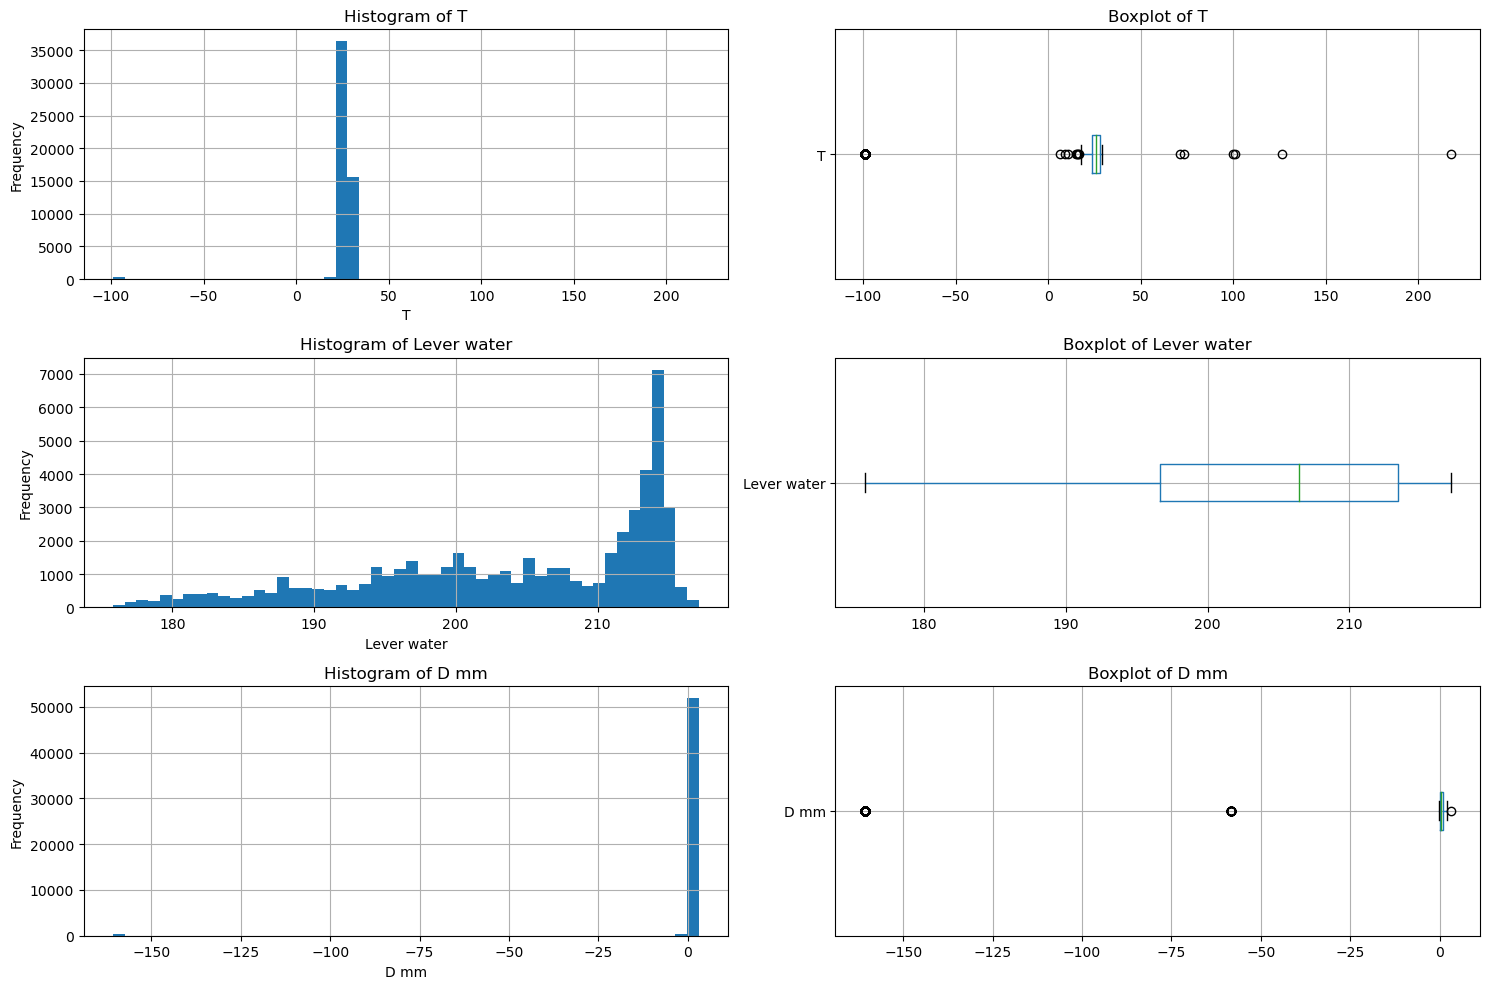

In [8]:
# Create subplots with histograms and boxplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Plot 'T' column
df['T'].hist(bins=50, ax=axes[0, 0])
df['T'].to_frame().boxplot(ax=axes[0, 1], vert=False)

# Plot 'Lever water' column
df['Lever water'].hist(bins=50, ax=axes[1, 0])
df['Lever water'].to_frame().boxplot(ax=axes[1, 1], vert=False)

# Plot 'D mm' column
df['D mm'].hist(bins=50, ax=axes[2, 0])
df['D mm'].to_frame().boxplot(ax=axes[2, 1], vert=False)

# Customize the subplots
axes[0, 0].set_xlabel('T')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of T')

axes[0, 1].set_title('Boxplot of T')

axes[1, 0].set_xlabel('Lever water')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Lever water')

axes[1, 1].set_title('Boxplot of Lever water')

axes[2, 0].set_xlabel('D mm')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Histogram of D mm')

axes[2, 1].set_title('Boxplot of D mm')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### Using Z score

In [9]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)


    for i in data:
        z_score= (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [10]:
outlier_T = detect_outliers(df['T'])
for item in outlier_T:
    print(item, end=' ')

100.1 101.2 217.5 126.4 71.3 73.37 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0

In [11]:
outlier_W = detect_outliers(df['Lever water'])
for item in outlier_W:
    print(item, end=' ')

In [12]:
outlier_D = detect_outliers(df['D mm'])
for item in outlier_D:
    print(item, end=' ')

-58.376885272500004 -58.384561195500005 -58.364842014000004 -58.401280591 -58.360959938 -58.359504159500005 -58.3986778355 -58.445086289500004 -58.393295866500004 -58.4031775145 -58.39210477500001 -58.391619515500004 -58.365636075000005 -58.40591261350001 -58.383767134500005 -58.385399371000005 -58.360562907500004 -58.3701798685 -58.3597688465 -58.356901404000006 -58.4246171615 -58.3917959735 -58.432204855500004 -58.371106273 -58.362195144000005 -58.385487600000005 -58.358533640500006 -58.3669153955 -58.3727385095 -58.3850905695 -58.37225325000001 -58.394795759500006 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -160.74424631686 -

### Outlier removal

In [13]:
condition1 = df['T'] > 0
condition2 = df['T'] < 50
condition3 = df['D mm'] > -50
df = df[condition1 & condition2 & condition3]


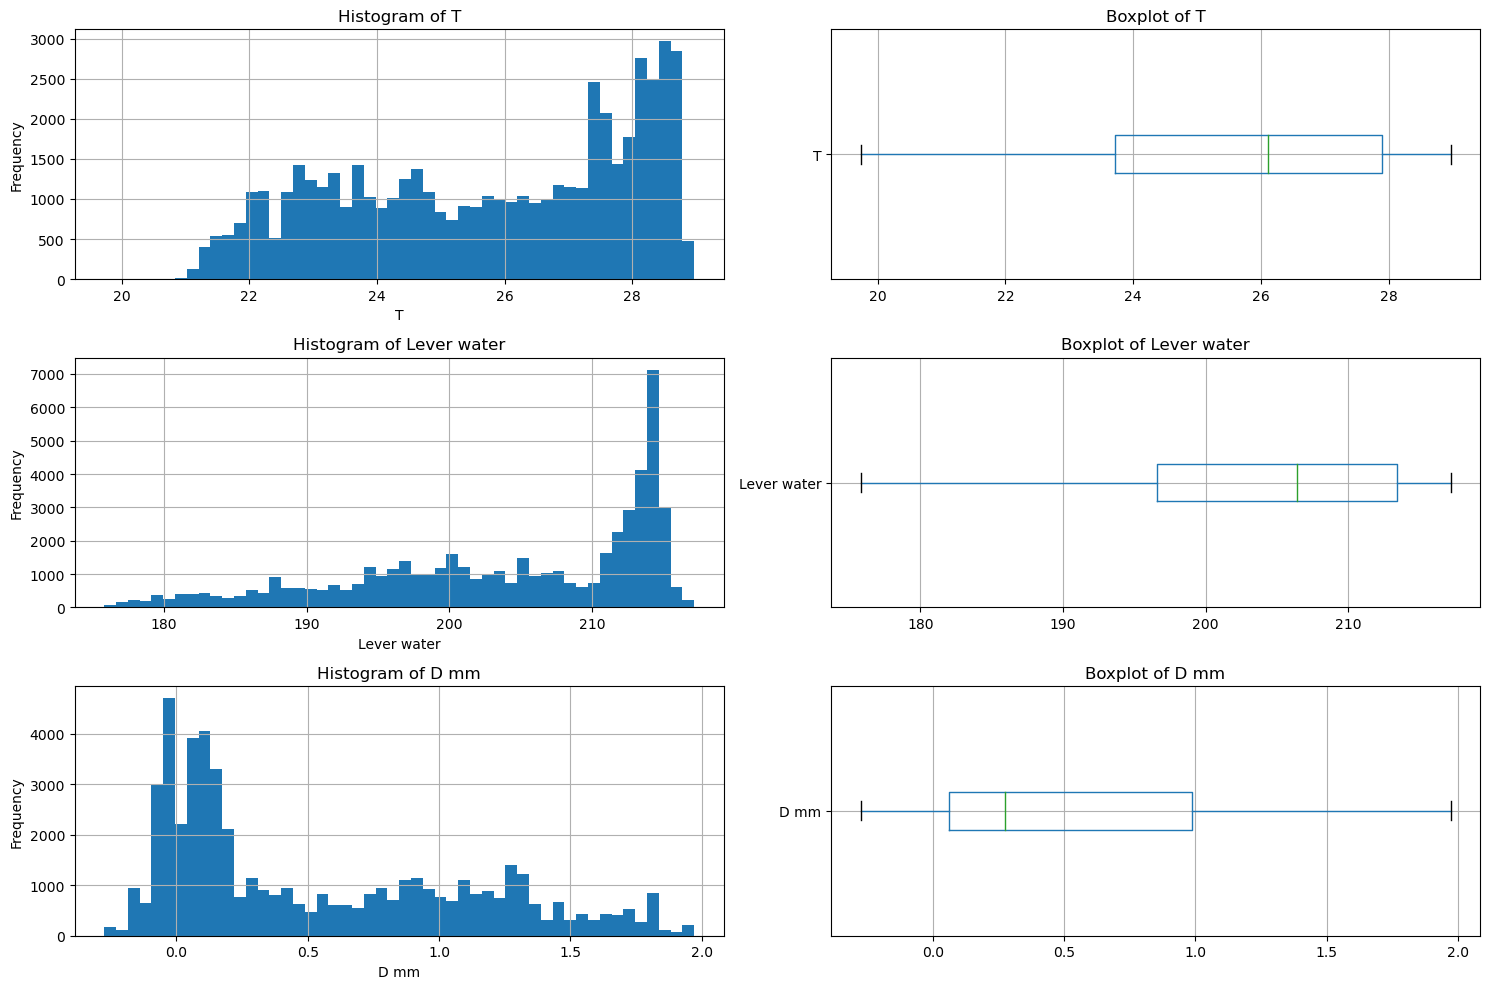

In [14]:
# Create subplots with histograms and boxplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Plot 'T' column
df['T'].hist(bins=50, ax=axes[0, 0])
df['T'].to_frame().boxplot(ax=axes[0, 1], vert=False)

# Plot 'Lever water' column
df['Lever water'].hist(bins=50, ax=axes[1, 0])
df['Lever water'].to_frame().boxplot(ax=axes[1, 1], vert=False)

# Plot 'D mm' column
df['D mm'].hist(bins=50, ax=axes[2, 0])
df['D mm'].to_frame().boxplot(ax=axes[2, 1], vert=False)

# Customize the subplots
axes[0, 0].set_xlabel('T')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of T')

axes[0, 1].set_title('Boxplot of T')

axes[1, 0].set_xlabel('Lever water')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Lever water')

axes[1, 1].set_title('Boxplot of Lever water')

axes[2, 0].set_xlabel('D mm')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Histogram of D mm')

axes[2, 1].set_title('Boxplot of D mm')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Visualizing the time series

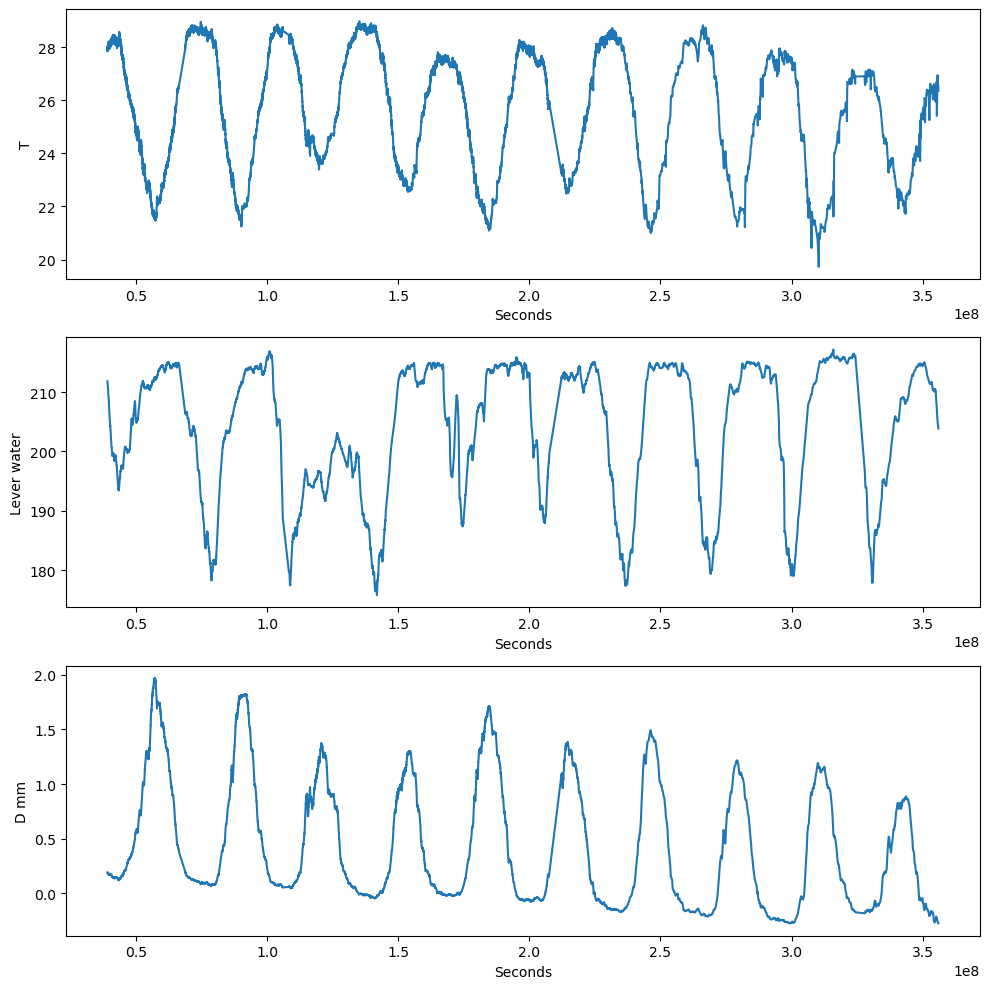

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Plot for 'T' column
axes[0].set_xlabel("Seconds")
axes[0].set_ylabel("T")
axes[0].plot(df['Seconds'], df['T'])

# Plot for 'Lever water' column
axes[1].set_xlabel("Seconds")
axes[1].set_ylabel("Lever water")
axes[1].plot(df['Seconds'], df['Lever water'])

# Plot for 'D mm' column
axes[2].set_xlabel("Seconds")
axes[2].set_ylabel("D mm")
axes[2].plot(df['Seconds'], df['D mm'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [47]:
df['Date'] = pd.to_datetime(df['Date'])

end_date = '2016-07-31'
mask = df['Date'] <= end_date

data_1 = df[mask]

data_1

,Time,T,D mm,Lever water,Day_of_week,Day,Month,Year,Hour,Date,Seconds,Season,Period
0,2012-09-08 15:00:00,26.35,-0.272825,203.84,Saturday,8,9,2012,15,2012-09-08,3.560484e+08,heavy rain,pm
1,2012-09-09 15:00:00,26.55,-0.274590,204.10,Sunday,9,9,2012,15,2012-09-09,3.559620e+08,heavy rain,pm
2,2012-09-10 15:00:00,26.52,-0.266053,204.47,Monday,10,9,2012,15,2012-09-10,3.558756e+08,heavy rain,pm
3,2012-09-11 15:00:00,26.86,-0.261221,204.77,Tuesday,11,9,2012,15,2012-09-11,3.557892e+08,heavy rain,pm
4,2012-09-12 15:00:00,26.94,-0.256358,205.10,Wednesday,12,9,2012,15,2012-09-12,3.557028e+08,heavy rain,pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,2016-07-27 06:00:00,28.29,-0.152216,185.69,Wednesday,27,7,2016,6,2016-07-27,2.335656e+08,heavy rain,am
1484,2016-07-28 06:00:00,28.22,-0.150998,185.69,Thursday,28,7,2016,6,2016-07-28,2.334792e+08,heavy rain,am
1485,2016-07-29 06:00:00,28.14,-0.147997,186.69,Friday,29,7,2016,6,2016-07-29,2.333928e+08,heavy rain,am
1486,2016-07-30 06:00:00,28.11,-0.147961,187.33,Saturday,30,7,2016,6,2016-07-30,2.333064e+08,heavy rain,am


## Data from 17:00 01 -08 -2016 -> Now

In [44]:
df['Date'] = pd.to_datetime(df['Date'])

start_date = '2016-08-01'
end_date = '2022-09-30'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

data_2 = df[mask]

data_2

,Time,T,D mm,Lever water,Day_of_week,Day,Month,Year,Hour,Date,Seconds,Season,Period
1488,2016-08-01 06:00:00,28.31,-0.147065,188.11,Monday,1,8,2016,6,2016-08-01,2.331336e+08,heavy rain,am
1489,2016-08-01 17:00:00,28.49,-0.146324,188.11,Monday,1,8,2016,17,2016-08-01,2.330940e+08,heavy rain,pm
1490,2016-08-01 18:00:00,28.48,-0.146198,188.11,Monday,1,8,2016,18,2016-08-01,2.330904e+08,heavy rain,pm
1491,2016-08-01 19:00:00,28.48,-0.146177,188.10,Monday,1,8,2016,19,2016-08-01,2.330868e+08,heavy rain,pm
1492,2016-08-01 20:00:00,28.49,-0.145920,188.09,Monday,1,8,2016,20,2016-08-01,2.330832e+08,heavy rain,pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52646,2022-09-25 19:00:00,27.91,0.189796,211.71,Sunday,25,9,2022,19,2022-09-25,3.903243e+07,heavy rain,pm
52647,2022-09-25 20:00:00,27.87,0.189740,211.74,Sunday,25,9,2022,20,2022-09-25,3.902883e+07,heavy rain,pm
52648,2022-09-25 21:00:00,27.87,0.190367,211.77,Sunday,25,9,2022,21,2022-09-25,3.902523e+07,heavy rain,pm
52649,2022-09-25 22:00:00,27.86,0.190916,211.79,Sunday,25,9,2022,22,2022-09-25,3.902163e+07,heavy rain,pm


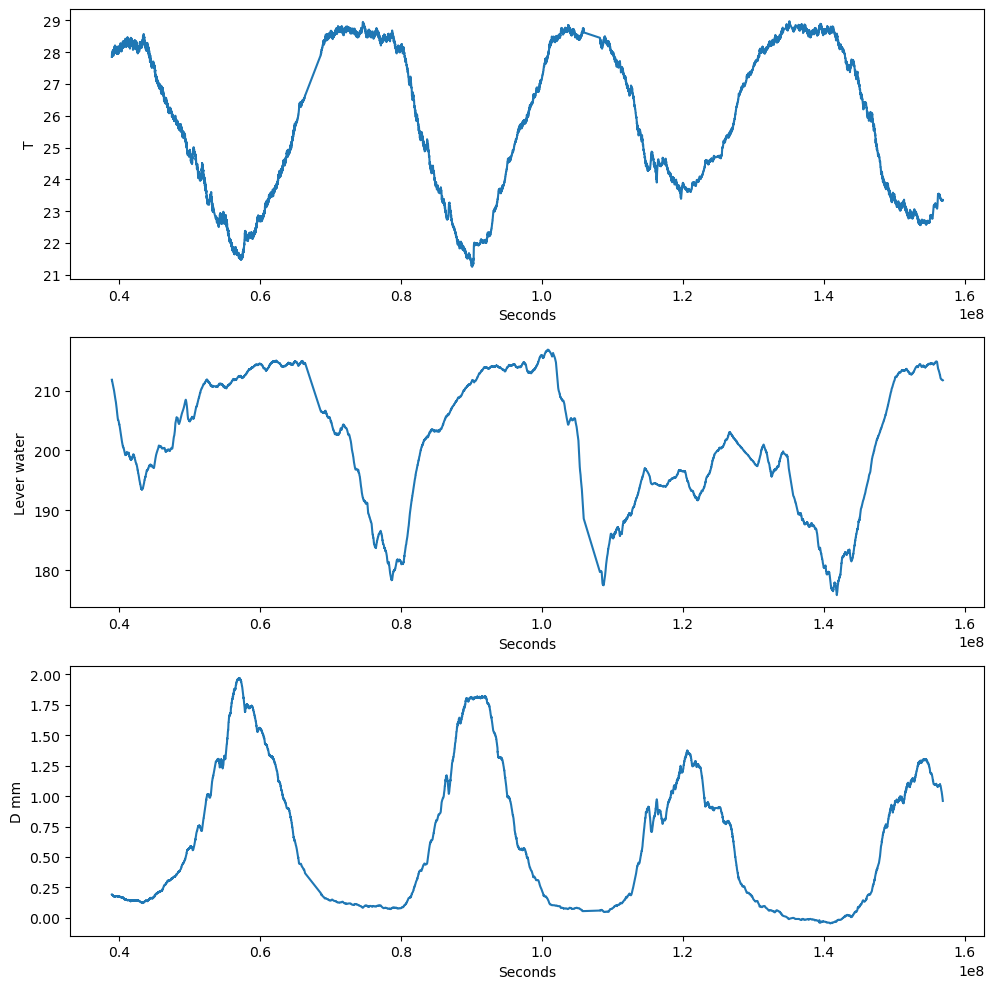

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Plot for 'T' column
axes[0].set_xlabel("Seconds")
axes[0].set_ylabel("T")
axes[0].plot(data['Seconds'], data['T'])

# Plot for 'Lever water' column
axes[1].set_xlabel("Seconds")
axes[1].set_ylabel("Lever water")
axes[1].plot(data['Seconds'], data['Lever water'])

# Plot for 'D mm' column
axes[2].set_xlabel("Seconds")
axes[2].set_ylabel("D mm")
axes[2].plot(data['Seconds'], data['D mm'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Histogram

In [18]:
def data_by_month(df, month):
    condition = df['Month'] == month
    data = df[condition]
    return data

def data_by_year(df, year):
    condition = df['Year'] == year
    data = df[condition]
    return data

def data_by_season(df):
    condition1 = df['Season'] == 'heavy rain'
    condition2 = df['Season'] == 'little rain'
    data1 = df[condition1]
    data2 = df[condition2]
    return data1, data2

def plot_histogram_by_month(df, month):
    data = data_by_month(df, month)

    if data.empty:
        print(f"Không có dữ liệu cho tháng {month}")
        return

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.hist(data['T'], bins=5, color='blue', alpha=0.7)
    plt.title(f"Histogram of T (degrees Celsius) in {calendar.month_name[month]}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.subplot(1, 3, 2)
    plt.hist(data['Lever water'], bins=5, color='green', alpha=0.7)
    plt.title(f"Histogram of Lever water in {calendar.month_name[month]}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.subplot(1, 3, 3)
    plt.hist(data['D mm'], bins=5, color='red', alpha=0.7)
    plt.title(f"Histogram of D mm in {calendar.month_name[month]}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.tight_layout()

    plt.show()

    selected_columns = data[['T', 'Lever water', 'D mm']]
    print(selected_columns.describe())

def plot_histogram_by_year(df, year):
    data = data_by_year(df, year)

    if data.empty:
        print(f"Không có dữ liệu cho năm {year}")
        return

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.hist(data['T'], bins=5, color='blue', alpha=0.7)
    plt.title(f"Histogram of T (degrees Celsius) in {year}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.subplot(1, 3, 2)
    plt.hist(data['Lever water'], bins=5, color='green', alpha=0.7)
    plt.title(f"Histogram of Lever water in {year}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.subplot(1, 3, 3)
    plt.hist(data['D mm'], bins=5, color='red', alpha=0.7)
    plt.title(f"Histogram of D mm in {year}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.tight_layout()

    plt.show()

    selected_columns = data[['T', 'Lever water', 'D mm']]
    print(selected_columns.describe())

    plt.show()

def plot_histogram_by_season(df):
    data1, data2 = data_by_season(df)

    # Create a 2x3 grid of subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Plot histograms for the 'T' column in both seasons
    axes[0, 0].hist(data1['T'], bins=5, color='blue', alpha=0.7)
    axes[0, 0].set_title(f"Histogram of T (degrees Celsius) (heavy rain)")
    axes[0, 0].set_xlabel("Value")
    axes[0, 0].set_ylabel("Frequency")

    axes[1, 0].hist(data2['T'], bins=5, color='blue', alpha=0.7)
    axes[1, 0].set_title(f"Histogram of T (degrees Celsius) (little rain)")
    axes[1, 0].set_xlabel("Value")
    axes[1, 0].set_ylabel("Frequency")

    # Plot histograms for the 'Lever water' column in both seasons
    axes[0, 1].hist(data1['Lever water'], bins=5, color='blue', alpha=0.7)
    axes[0, 1].set_title(f"Histogram of Lever water (heavy rain)")
    axes[0, 1].set_xlabel("Value")
    axes[0, 1].set_ylabel("Frequency")

    axes[1, 1].hist(data2['Lever water'], bins=5, color='blue', alpha=0.7)
    axes[1, 1].set_title(f"Histogram of Lever water (little rain)")
    axes[1, 1].set_xlabel("Value")
    axes[1, 1].set_ylabel("Frequency")

    # Plot histograms for the 'D mm' column in both seasons
    axes[0, 2].hist(data1['D mm'], bins=5, color='blue', alpha=0.7)
    axes[0, 2].set_title(f"Histogram of D mm (heavy rain)")
    axes[0, 2].set_xlabel("Value")
    axes[0, 2].set_ylabel("Frequency")

    axes[1, 2].hist(data2['D mm'], bins=5, color='blue', alpha=0.7)
    axes[1, 2].set_title(f"Histogram of D mm (little rain)")
    axes[1, 2].set_xlabel("Value")
    axes[1, 2].set_ylabel("Frequency")

    plt.tight_layout()

    plt.show()




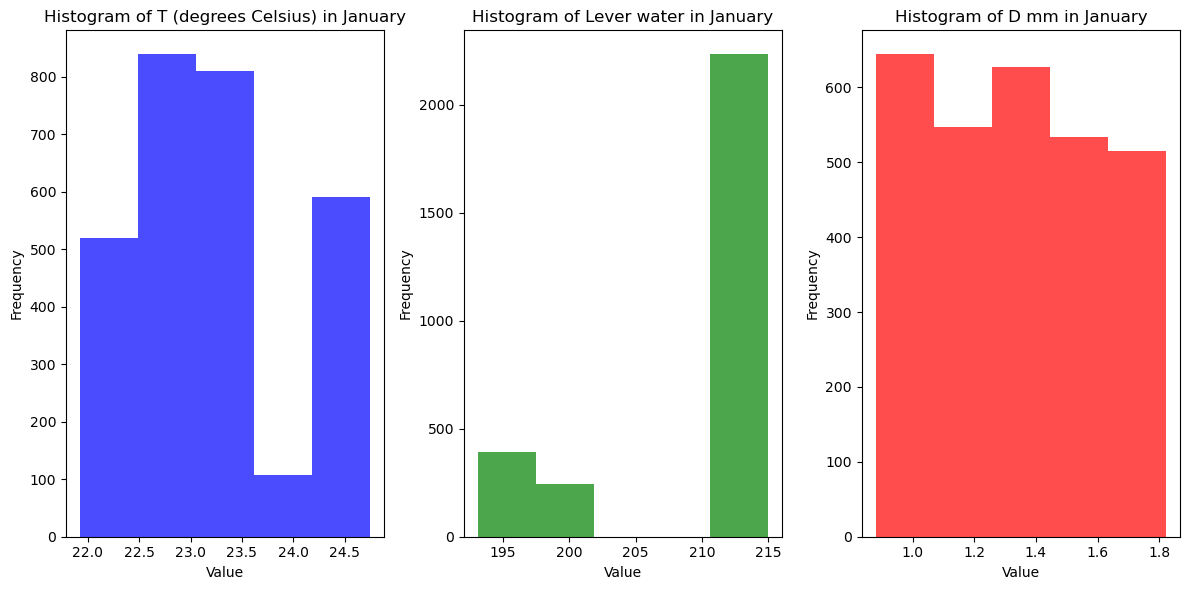

                 T  Lever water         D mm
count  2867.000000  2867.000000  2867.000000
mean     23.221531   210.145473     1.321982
std       0.828847     7.270145     0.298635
min      21.930000   193.140000     0.882322
25%      22.660000   212.040000     1.083021
50%      23.120000   213.880000     1.303143
75%      23.590000   214.350000     1.544795
max      24.740000   214.960000     1.820303


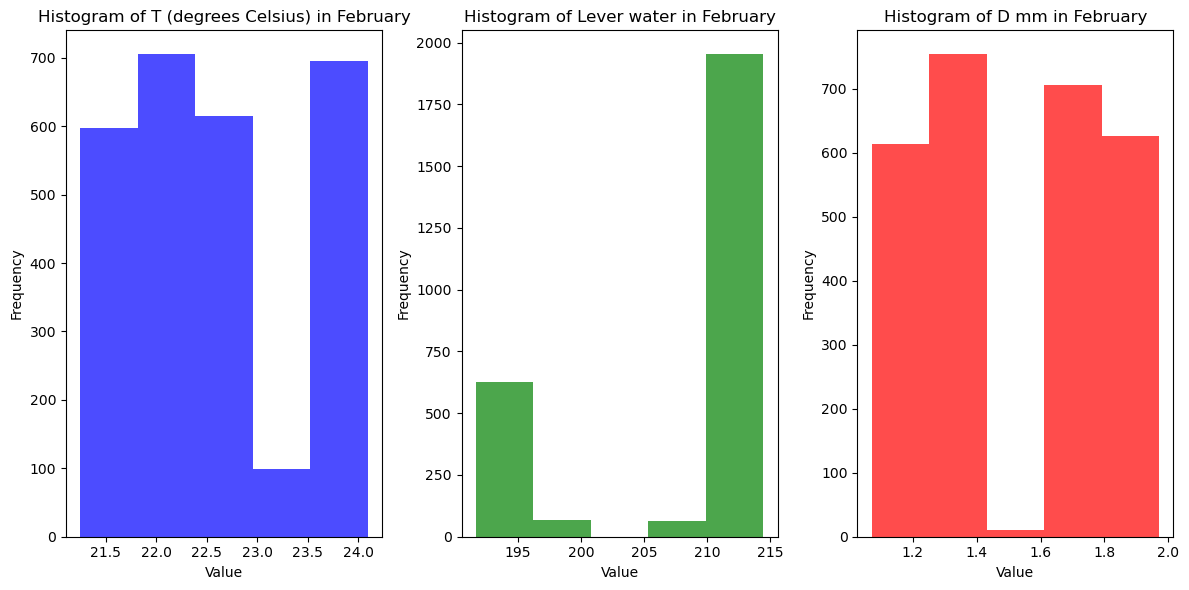

                 T  Lever water         D mm
count  2712.000000  2712.000000  2712.000000
mean     22.608639   207.706287     1.503296
std       0.838403     8.441442     0.279895
min      21.250000   191.670000     1.070994
25%      21.930000   196.500000     1.255559
50%      22.580000   212.200000     1.367273
75%      23.610000   213.450000     1.783647
max      24.090000   214.460000     1.971190


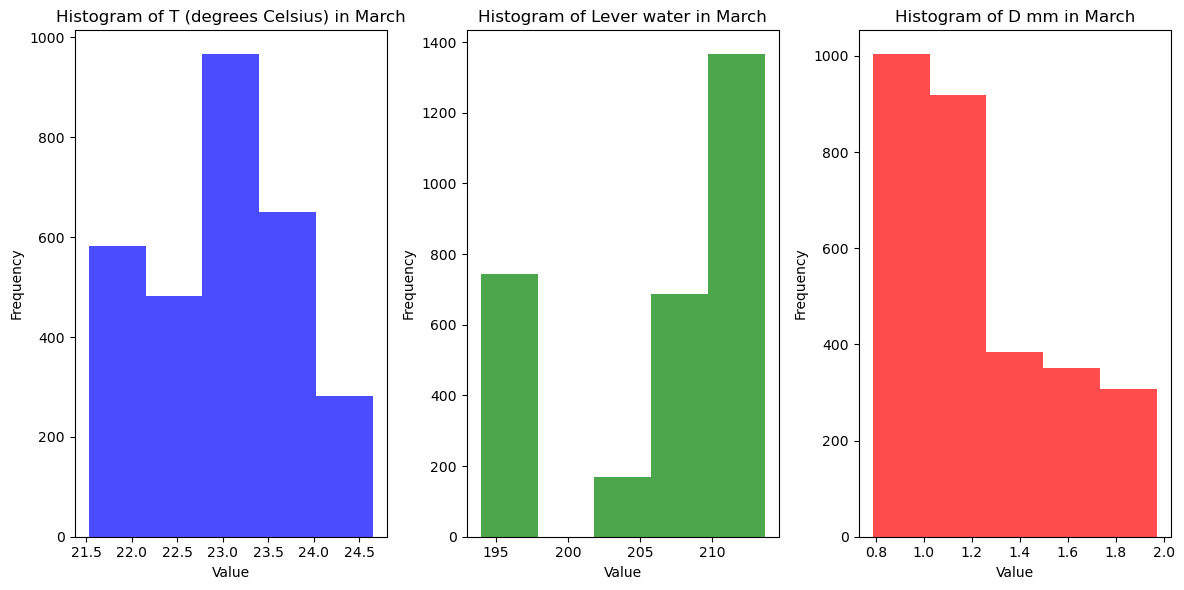

                 T  Lever water         D mm
count  2964.000000  2964.000000  2964.000000
mean     23.022082   206.435216     1.229801
std       0.769107     6.699011     0.316767
min      21.530000   193.940000     0.787273
25%      22.450000   196.730000     0.974770
50%      23.130000   208.905000     1.132700
75%      23.610000   211.740000     1.426824
max      24.650000   213.640000     1.970509


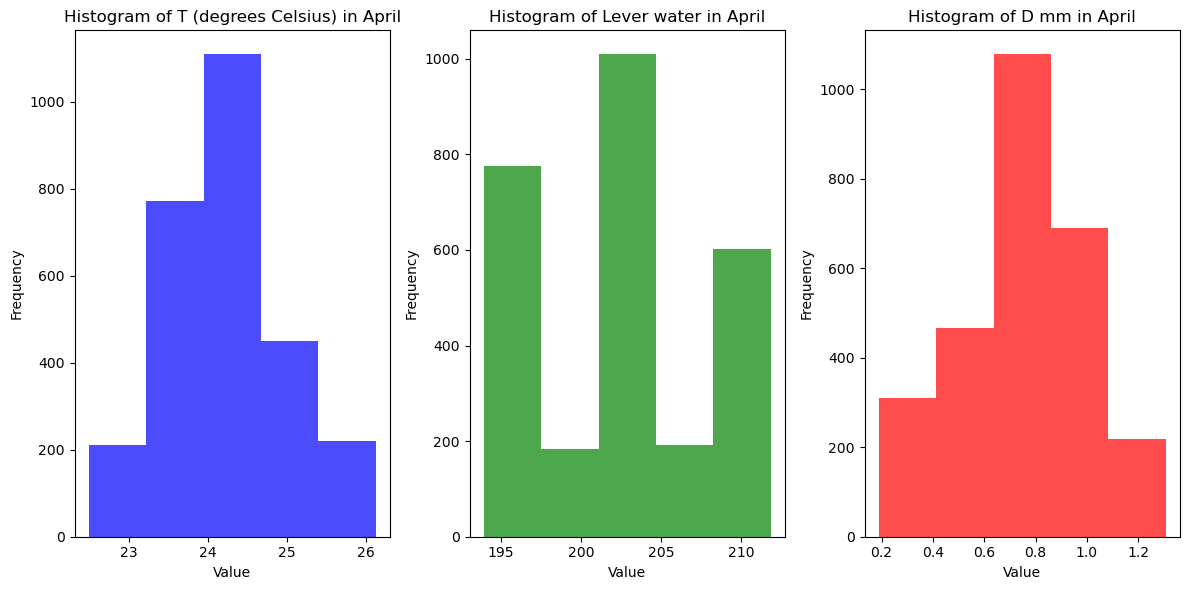

                 T  Lever water         D mm
count  2763.000000  2763.000000  2763.000000
mean     24.250174   202.442121     0.752828
std       0.754558     5.913067     0.254863
min      22.500000   193.960000     0.190631
25%      23.760000   196.340000     0.608261
50%      24.310000   203.160000     0.792255
75%      24.660000   206.005000     0.893676
max      26.120000   211.850000     1.306528


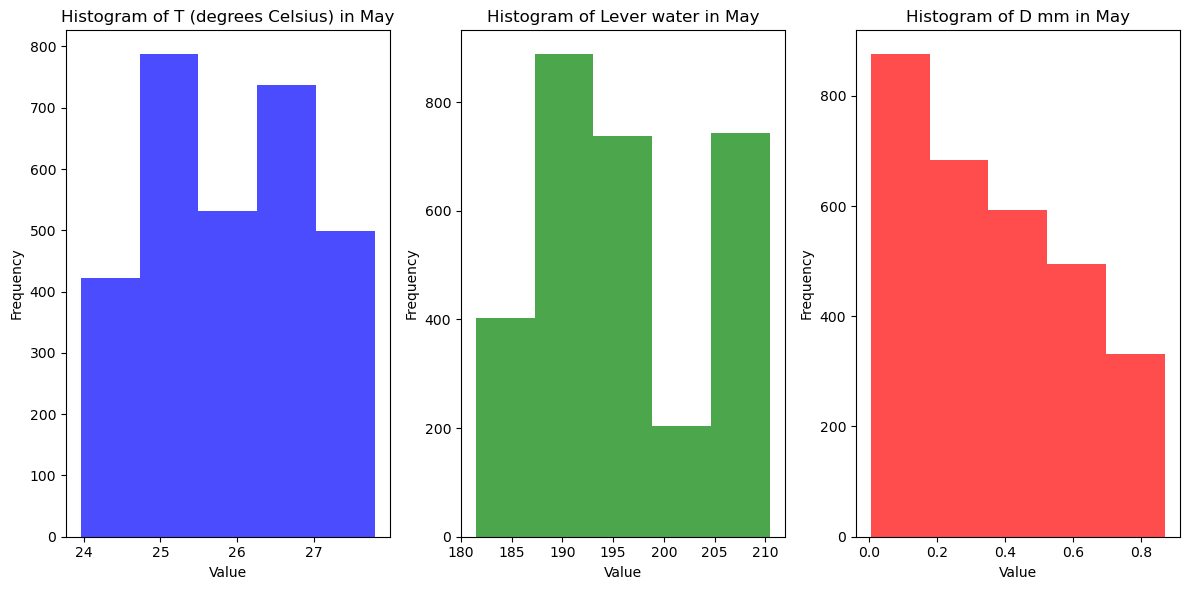

                T  Lever water         D mm
count  2976.00000  2976.000000  2976.000000
mean     25.91662   195.753246     0.353635
std       1.03856     7.840047     0.229863
min      23.96000   181.450000     0.005385
25%      25.03000   189.987500     0.161616
50%      25.95000   194.390000     0.319342
75%      26.77000   202.517500     0.557181
max      27.80000   210.470000     0.871474


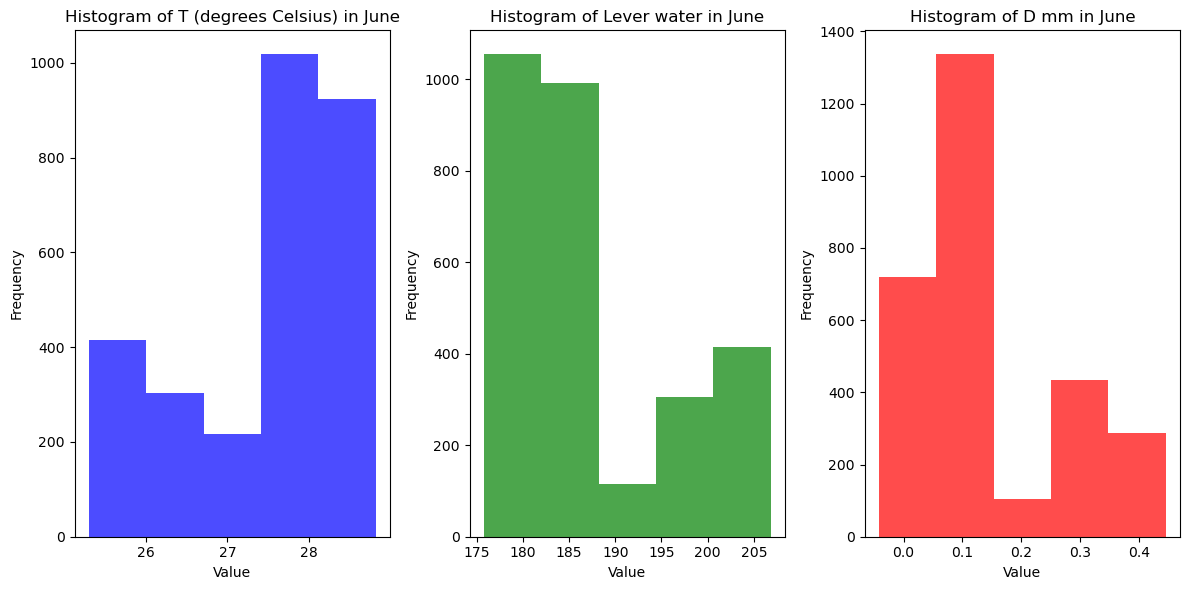

                 T  Lever water         D mm
count  2880.000000  2880.000000  2880.000000
mean     27.464792   187.622802     0.133105
std       0.967128     9.256274     0.132574
min      25.310000   175.810000    -0.041621
25%      26.785000   181.140000     0.053643
50%      27.760000   184.190000     0.083941
75%      28.160000   191.672500     0.200701
max      28.810000   206.810000     0.445743


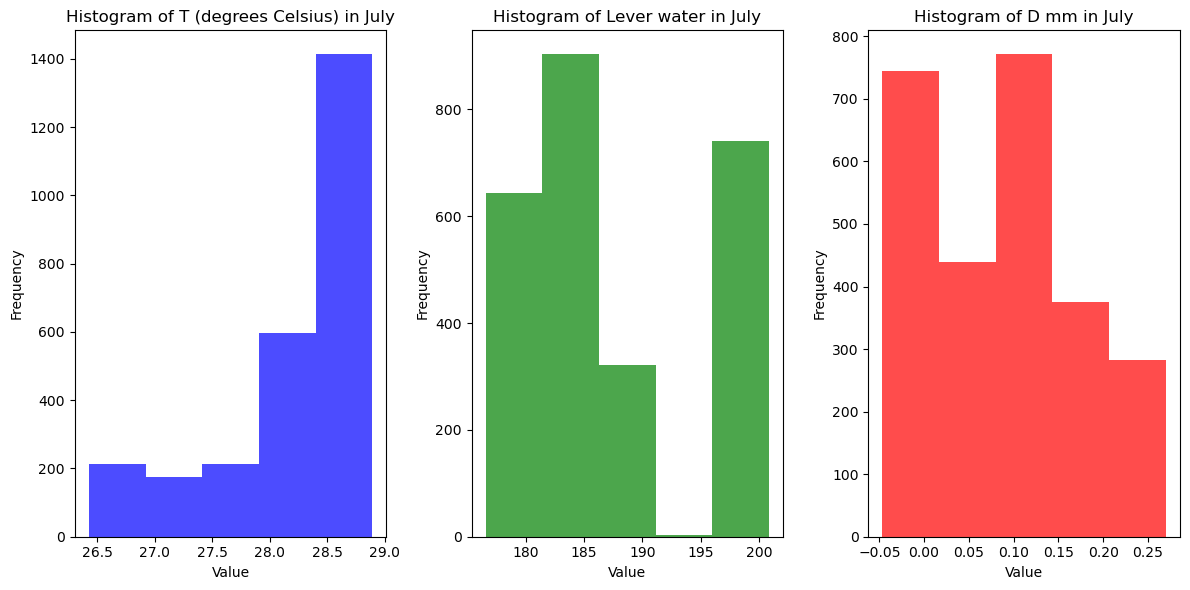

                 T  Lever water         D mm
count  2612.000000  2612.000000  2612.000000
mean     28.200555   187.507242     0.078921
std       0.617010     7.655338     0.087157
min      26.430000   176.590000    -0.046461
25%      28.070000   181.600000    -0.019680
50%      28.440000   185.125000     0.085172
75%      28.630000   196.960000     0.144874
max      28.890000   200.830000     0.270008


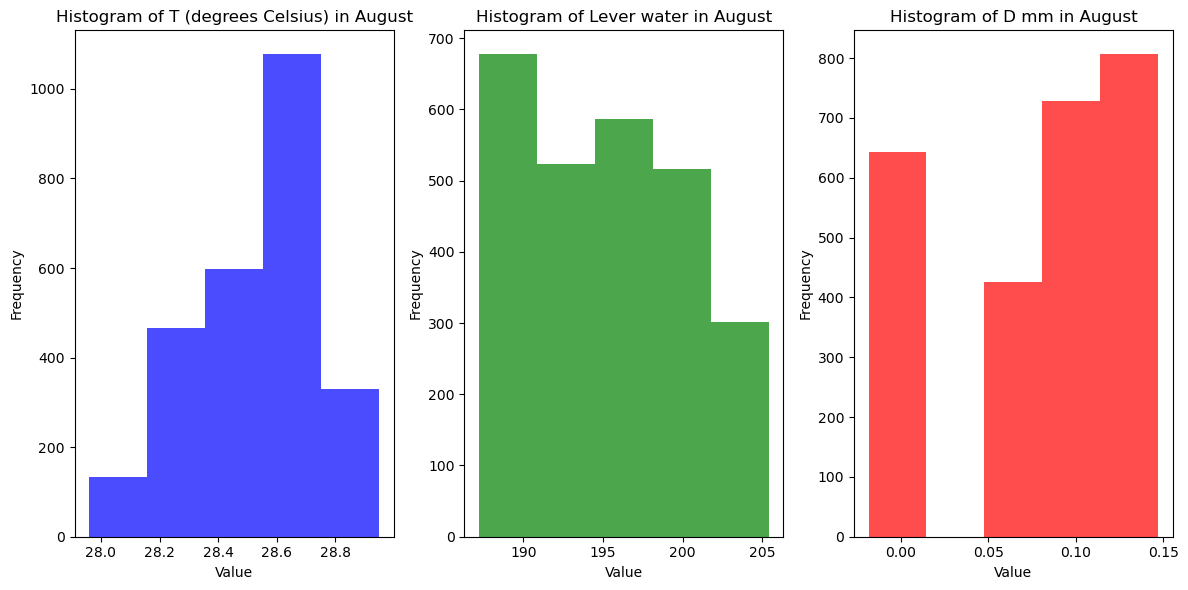

                 T  Lever water         D mm
count  2604.000000  2604.000000  2604.000000
mean     28.533222   194.991624     0.078861
std       0.208237     5.259339     0.057594
min      27.960000   187.210000    -0.018490
25%      28.380000   190.137500     0.054666
50%      28.580000   195.200000     0.096471
75%      28.690000   198.830000     0.126764
max      28.950000   205.400000     0.147225


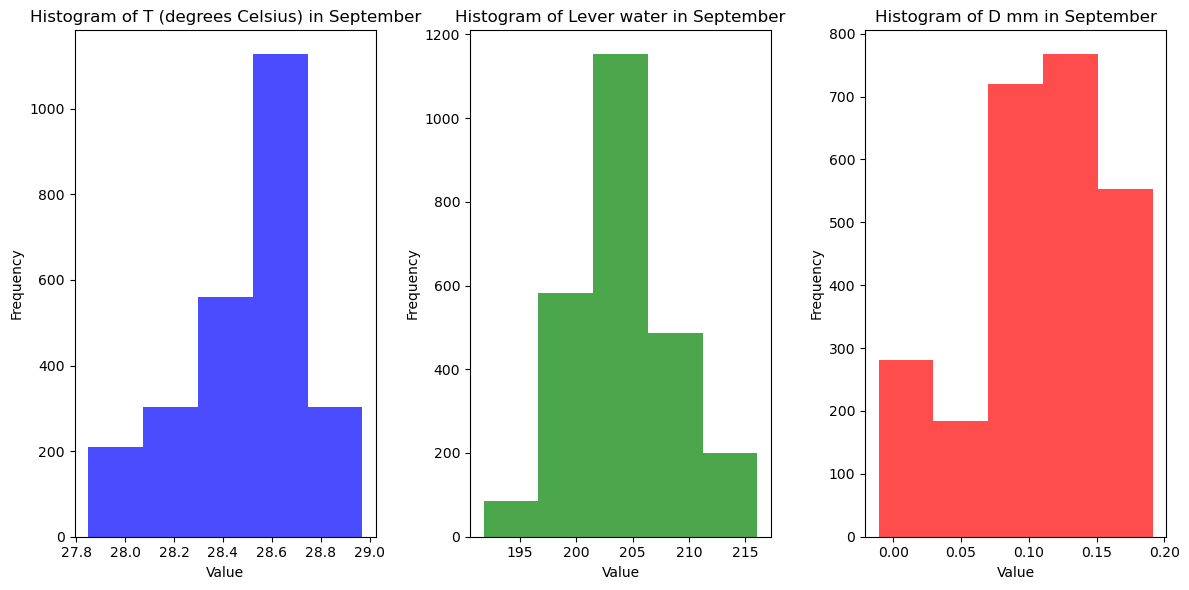

                 T  Lever water         D mm
count  2505.000000  2505.000000  2505.000000
mean     28.506355   204.123426     0.106581
std       0.248261     4.866508     0.052353
min      27.850000   191.810000    -0.010651
25%      28.350000   200.650000     0.076647
50%      28.590000   203.750000     0.116437
75%      28.700000   207.350000     0.147693
max      28.970000   216.060000     0.191296


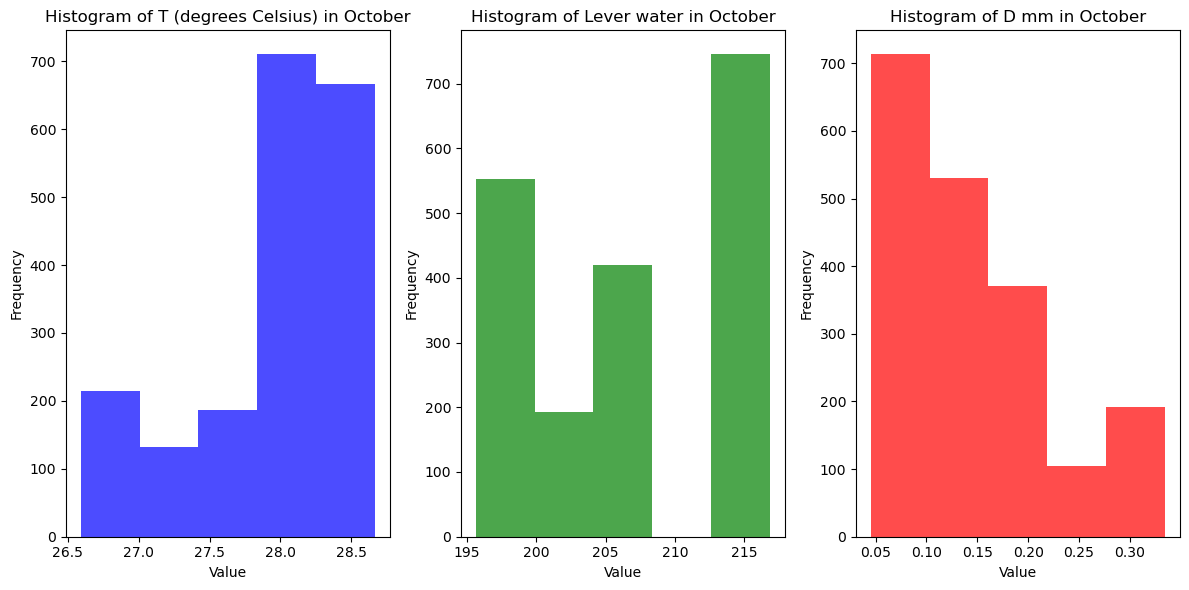

                 T  Lever water         D mm
count  1909.000000  1909.000000  1909.000000
mean     27.945699   206.787512     0.145077
std       0.537879     7.785221     0.075977
min      26.590000   195.630000     0.045086
25%      27.770000   199.200000     0.090888
50%      28.100000   206.280000     0.141029
75%      28.330000   215.640000     0.176852
max      28.670000   216.860000     0.334724


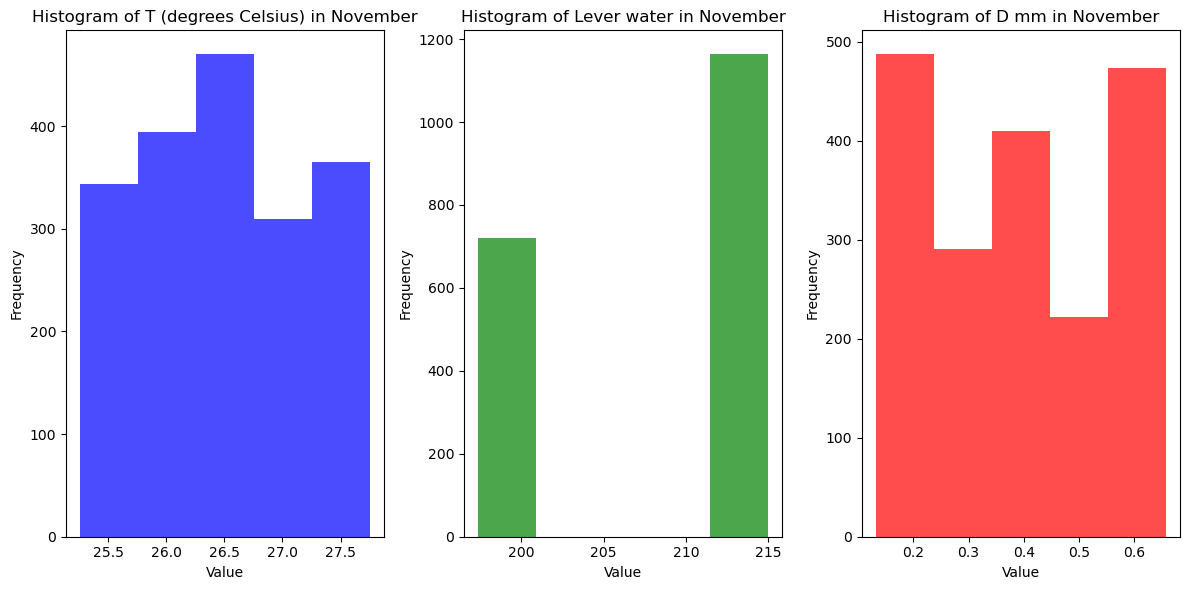

                 T  Lever water         D mm
count  1883.000000  1883.000000  1883.000000
mean     26.484190   208.347706     0.383836
std       0.689979     7.347449     0.159035
min      25.260000   197.380000     0.133187
25%      25.820000   199.600000     0.228358
50%      26.410000   213.300000     0.399678
75%      27.050000   214.440000     0.553057
max      27.750000   214.970000     0.656332


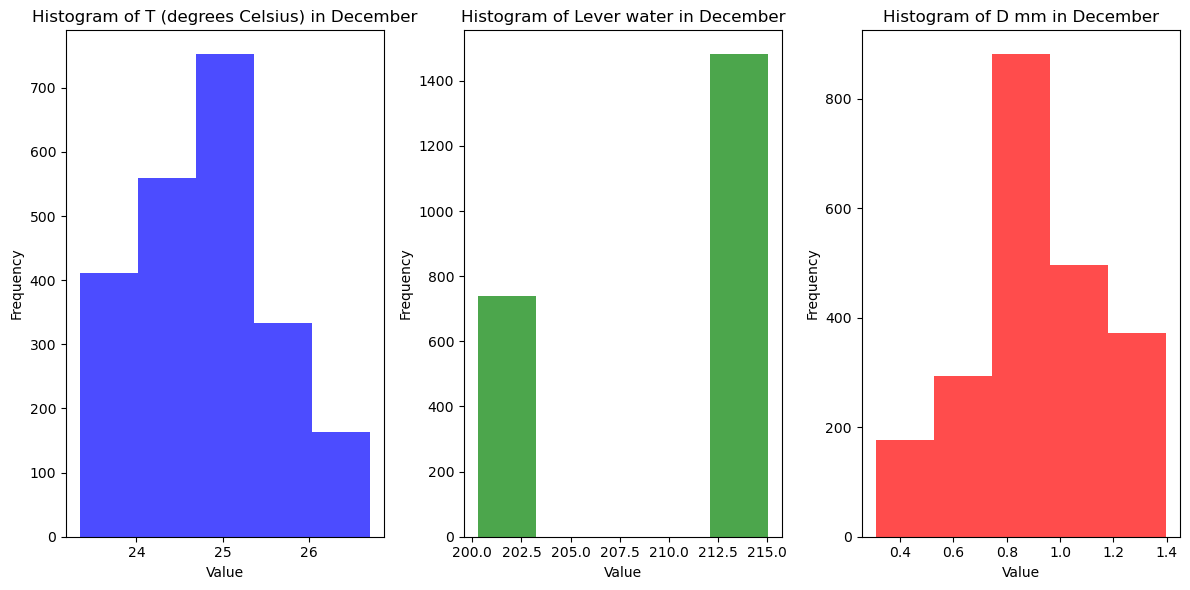

                 T  Lever water         D mm
count  2220.000000  2220.000000  2220.000000
mean     24.805878   210.024739     0.903034
std       0.758289     5.912055     0.247000
min      23.350000   200.300000     0.310510
25%      24.217500   202.330000     0.770380
50%      24.800000   213.930000     0.894164
75%      25.320000   214.340000     1.081586
max      26.700000   215.040000     1.395850


In [19]:
for month in range(1, 13):
    plot_histogram_by_month(data, month)

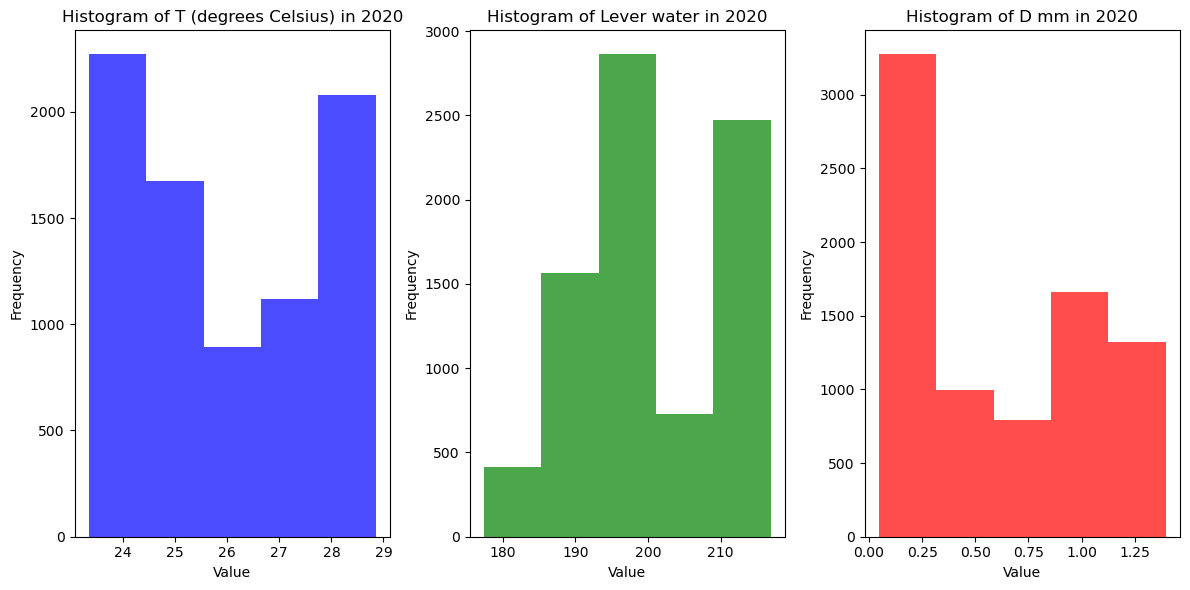

                 T  Lever water         D mm
count  8040.000000  8040.000000  8040.000000
mean     25.962484   200.276495     0.586070
std       1.807761    10.819993     0.447515
min      23.350000   177.460000     0.047292
25%      24.350000   193.247500     0.106526
50%      25.610000   196.340000     0.561595
75%      27.820000   213.420000     0.947918
max      28.850000   216.860000     1.395850


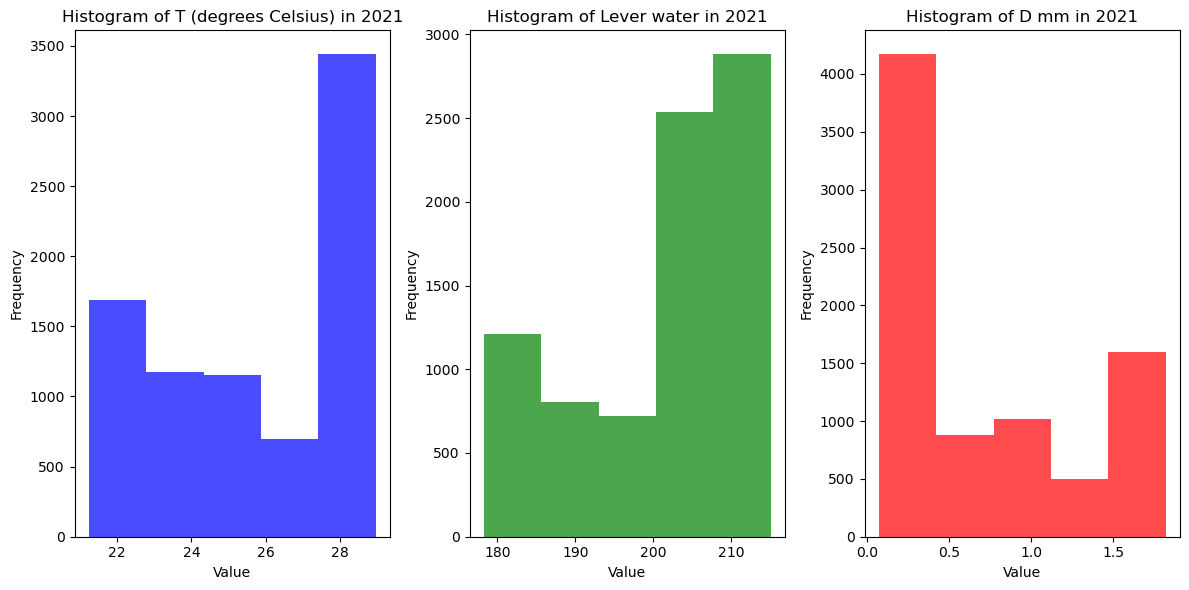

                 T  Lever water         D mm
count  8154.000000  8154.000000  8154.000000
mean     25.780775   201.834832     0.664635
std       2.633233    11.133855     0.632909
min      21.250000   178.300000     0.071237
25%      23.220000   193.375000     0.110536
50%      25.950000   203.640000     0.400738
75%      28.500000   211.750000     1.130927
max      28.950000   215.040000     1.820303


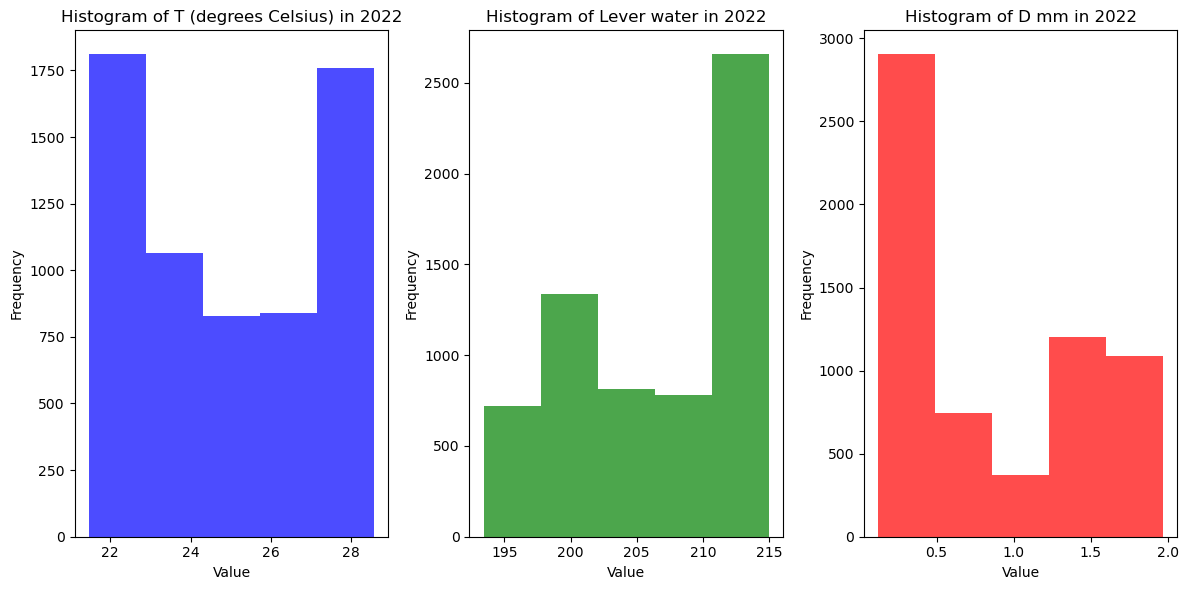

                 T  Lever water         D mm
count  6302.000000  6302.000000  6302.000000
mean     25.020752   206.518079     0.812013
std       2.362065     6.333267     0.637816
min      21.470000   193.440000     0.120670
25%      22.790000   200.270000     0.177901
50%      24.790000   207.940000     0.578820
75%      27.650000   211.857500     1.418510
max      28.570000   214.960000     1.971190


In [20]:
for year in [2020, 2021, 2022]:
  plot_histogram_by_year(data, year)

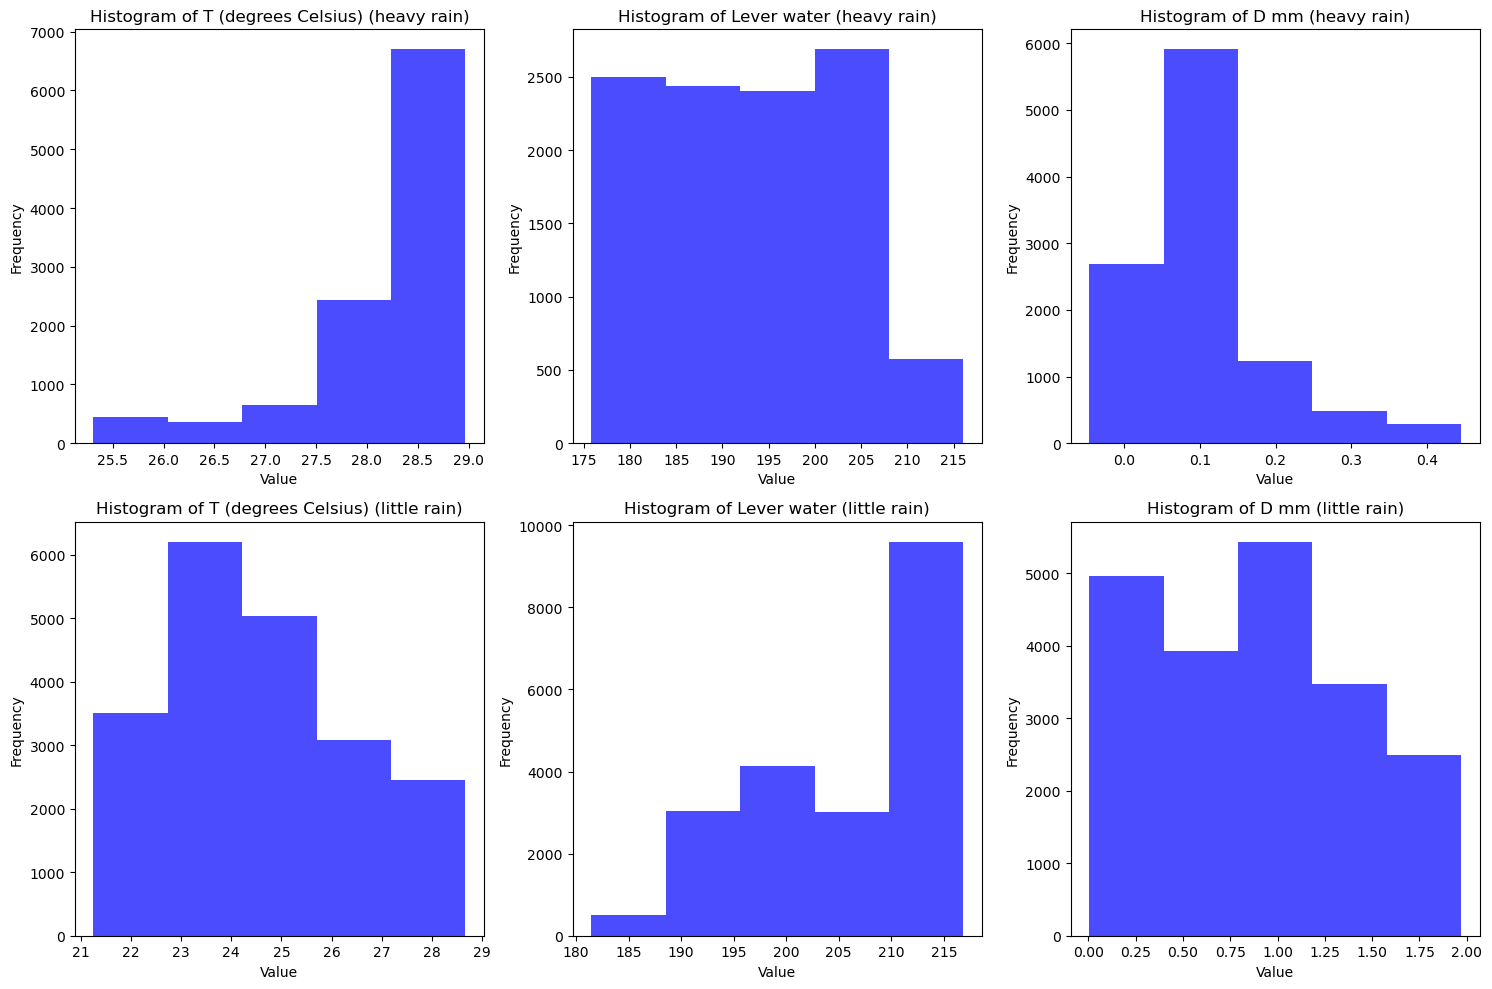

In [21]:
plot_histogram_by_season(data)

## Correlation

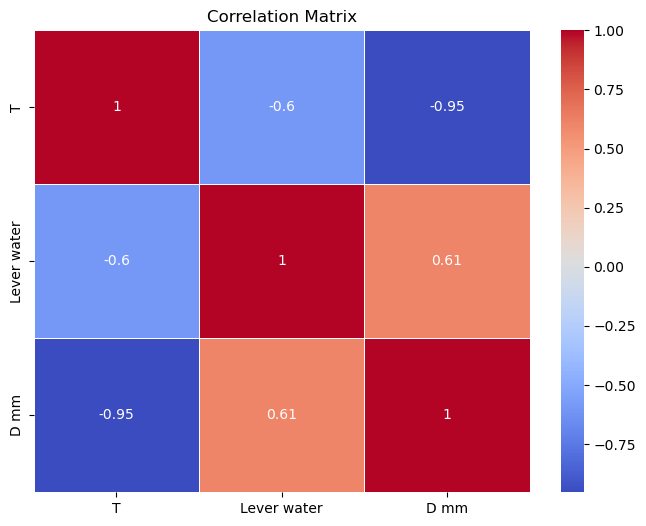

In [22]:
correlation_matrix = data[['T', 'Lever water', 'D mm']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model

In [23]:
data

,Time,T,D mm,Lever water,Day_of_week,Day,Month,Year,Hour,Date,Seconds,Season,Period
21421,2019-01-01 00:00:00,23.34,0.960331,211.74,Tuesday,1,1,2019,0,2019-01-01,1.568640e+08,little rain,am
21422,2019-01-01 01:00:00,23.34,0.961541,211.75,Tuesday,1,1,2019,1,2019-01-01,1.568604e+08,little rain,am
21423,2019-01-01 02:00:00,23.34,0.962847,211.75,Tuesday,1,1,2019,2,2019-01-01,1.568568e+08,little rain,am
21424,2019-01-01 03:00:00,23.35,0.964806,211.75,Tuesday,1,1,2019,3,2019-01-01,1.568532e+08,little rain,am
21425,2019-01-01 04:00:00,23.35,0.966685,211.76,Tuesday,1,1,2019,4,2019-01-01,1.568496e+08,little rain,am
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52646,2022-09-25 19:00:00,27.91,0.189796,211.71,Sunday,25,9,2022,19,2022-09-25,3.903243e+07,heavy rain,pm
52647,2022-09-25 20:00:00,27.87,0.189740,211.74,Sunday,25,9,2022,20,2022-09-25,3.902883e+07,heavy rain,pm
52648,2022-09-25 21:00:00,27.87,0.190367,211.77,Sunday,25,9,2022,21,2022-09-25,3.902523e+07,heavy rain,pm
52649,2022-09-25 22:00:00,27.86,0.190916,211.79,Sunday,25,9,2022,22,2022-09-25,3.902163e+07,heavy rain,pm


In [24]:
data = df.drop(['Time','Day_of_week', 'Day', 'Year','Hour','Date','Seconds'], axis = 1)
data

,T,D mm,Lever water,Month,Season,Period
0,26.35,-0.272825,203.84,9,heavy rain,pm
1,26.55,-0.274590,204.10,9,heavy rain,pm
2,26.52,-0.266053,204.47,9,heavy rain,pm
3,26.86,-0.261221,204.77,9,heavy rain,pm
4,26.94,-0.256358,205.10,9,heavy rain,pm
...,...,...,...,...,...,...
52646,27.91,0.189796,211.71,9,heavy rain,pm
52647,27.87,0.189740,211.74,9,heavy rain,pm
52648,27.87,0.190367,211.77,9,heavy rain,pm
52649,27.86,0.190916,211.79,9,heavy rain,pm


In [25]:
data = pd.get_dummies(data, columns=['Season', 'Period'])
data

,T,D mm,Lever water,Month,Season_heavy rain,Season_little rain,Period_am,Period_pm
0,26.35,-0.272825,203.84,9,True,False,False,True
1,26.55,-0.274590,204.10,9,True,False,False,True
2,26.52,-0.266053,204.47,9,True,False,False,True
3,26.86,-0.261221,204.77,9,True,False,False,True
4,26.94,-0.256358,205.10,9,True,False,False,True
...,...,...,...,...,...,...,...,...
52646,27.91,0.189796,211.71,9,True,False,False,True
52647,27.87,0.189740,211.74,9,True,False,False,True
52648,27.87,0.190367,211.77,9,True,False,False,True
52649,27.86,0.190916,211.79,9,True,False,False,True


In [26]:
X = data.drop(['D mm'], axis = 1).values
y = data['D mm'].values

In [27]:
# data_group_month = df.groupby(['Month','Season','Period'])['T','D mm','Lever water'].mean().reset_index()
# desired_columns = ['T', 'D mm', 'Lever water', 'Month', 'Season', 'Period']
# data_group_month = data_group_month.reindex(columns=desired_columns)
# data_group_month

In [28]:
# data_group_month = pd.get_dummies(data_group_month, columns=['Season', 'Period'])
# data_group_month